# INF367 - Project 2

- Deadline: Sunday, 17.11.19, 23.59
- Submission details: Jupyter-notebook
- Deliver here [MittUIB.no/assignments](MittUIB.no/assignments)

Projects are a compulsory part of the course. This project contributes 20% to the final grade. The grade will be based good choice of methods, correctness of answers, clarity of code and thoroughness and clarity of reporting. 

*Deliverables:* A jupyter notebook containing all the code to reproduce your work and a report of all your methodological choices and results. Please "restart and run all" before submission, so that you submit a clean version. 

Code should be documented and special tricks (e.g. to avoid division by zero, to make sure it takes finite time to run, etc.) should be reported. The rational behind all steps in the code should be clear from the report. In particular, if you use subsampling, you should report it, and you should consider for each step how much subsampling is appropriate. 

**NOTE:** This project is a learning experience. If we see that you have copied your answers from online resources, you will get 0 points. 
This is an application project, that means you may use any freely available library for the application tasks of the project.  

Model selection is an important part of the task and will be graded accordingly. Before applying machine learning algorithms, you should always consider (and report) what results you expect. When you have successfully applied machine learning algorithms, you should always comment on how well the results match your expectations. 

## Task 1 - Preprocessing 
(10 points)

In the next task, you will prepare the mass cytometry dataset for analysis. 

The datasets contain information on 20,000 blood cells of 20 rheumatoid arthritis patients and 20 healthy controls. The first two columns identify the patient and the patient group. The remaining columns are the cell markers measured. 

In this task you summarize and visualize the data and prepare it for analysis. 

- Check for any missing values and handle these appropriately.
- Find the ranges and basic statistics of the features and rescale them if appropriate. For similar data, scaling using `arcsinh(x/5)` has been used successfully. 
- Visualize the univariate densities of all features using your favorite density estimator.
- Calculate basic bivariate statistics, such as correlations. 
- Perform any other appropriate preprocessing steps. 
- Discuss the results of your summaries and visualization efforts and explain your preprocessing choices (not doing any preprocessing is also a choice). 

### Data loading and exploration

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import scipy

from tqdm.notebook import tqdm

np.random.seed(42)

<IPython.core.display.Javascript object>

In [3]:
from sklearn.preprocessing import StandardScaler

<IPython.core.display.Javascript object>

In [4]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML

plt.rcParams["figure.figsize"] = (15, 5)
%matplotlib inline

<IPython.core.display.Javascript object>

In [69]:
data_frame = pd.read_csv("cell_data.csv")

<IPython.core.display.Javascript object>

In [70]:
data_frame[:5]

,id,group,147Sm_CD20,170Er_CD3,145Nd_CD4,146Nd_CD8a,169Tm_CD45RA,176Yb_CD56,148Nd_CD16,160Gd_CD14,209Bi_CD61,159Tb_CD11c,151Eu_CD123,174Yb_HLA-DR
0,1,control,0.000,131.332001,35.242001,5.460,13.194000,0.000,0.0,0.0,0.000,0.00,0.0,0.0
1,1,control,0.000,442.416992,34.754002,0.000,199.770996,0.000,0.0,0.0,0.000,1.06,0.0,0.0
2,1,control,0.489,252.893005,38.896000,1.158,115.276001,0.605,0.0,0.0,1.077,0.00,0.0,0.0
3,1,control,0.000,438.648987,43.154999,3.116,56.352001,0.000,0.0,0.0,0.000,0.00,0.0,0.0
4,1,control,0.000,195.774002,16.608999,0.000,3.942000,0.000,0.0,0.0,0.000,0.00,0.0,0.0


<IPython.core.display.Javascript object>

In [7]:
data_frame.shape

(800000, 14)

<IPython.core.display.Javascript object>

* Because we have little knowledge about the features and their actual meaning, the first step would be to find more information about this problematic.
* After further exploration, I found that data are probably coming from the study *Candidate Markers for Stratification and Classification in Rheumatoid Arthritis*([link](https://www.frontiersin.org/articles/10.3389/fimmu.2019.01488/full)).
* From the article, we could find that:
    * "Using mass cytometry, up to 50 markers can be simultaneously analyzed with single cell resolution with relatively **little signal overlap** and **very low background noise**"
        * this could be valuable for data preprocessing and choosing of method
    * "Twenty healthy donors (HD, 4 male, 16 female, ages 39–67) and 20 RA patients (4 male, 16 female, ages 31–76)"
        * this could be valuable for cluster sizes

### Checking missing values

In [8]:
all(data_frame.isnull().sum() == 0)

True

<IPython.core.display.Javascript object>

There are no missing values in dataset

### Samplling dataset

Same number of values id: True
Same number of values group: True


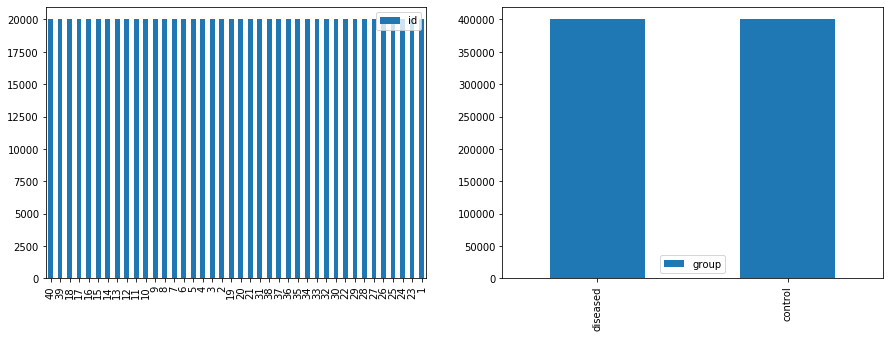

<IPython.core.display.Javascript object>

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
for index, ax in zip(["id", "group"], axs):
    counts = data_frame[[index]].apply(pd.value_counts)

    count_values = counts.values.flatten()

    print(f"Same number of values {index}: {np.all(count_values == count_values[0])}")

    counts.plot(ax=ax, kind="bar")

plt.show()

In [71]:
sampled_frame = data_frame.sample(5000, random_state=42)

<IPython.core.display.Javascript object>

group KS test p-value: 1.00e+00
id KS test p-value: 6.58e-05


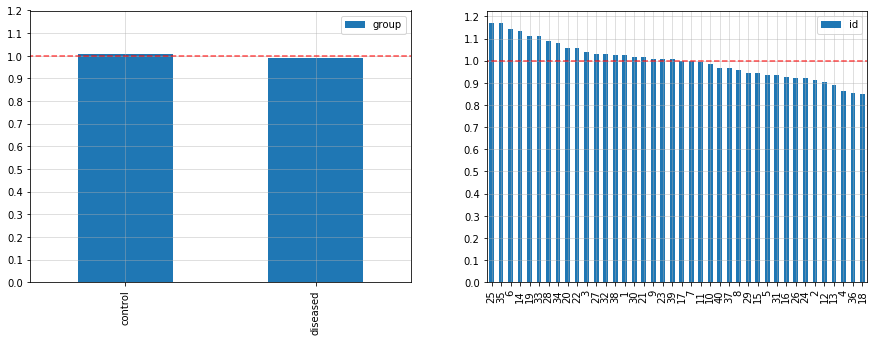

<IPython.core.display.Javascript object>

In [72]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
for index, ax in zip(["group", "id"], axs):
    labels = np.unique(sampled_frame[index])

    counts = sampled_frame[[index]].apply(pd.value_counts) / (
        sampled_frame.shape[0] / labels.shape[0]
    )

    ax.hlines(
        1.0, -10, labels.shape[0], color="r", linestyle="--", alpha=0.7,
    )

    count_values = counts.values.flatten()
    ks_test = scipy.stats.ks_2samp(
        np.full(shape=count_values.shape, fill_value=1.0,), count_values,
    )

    print(f"{index} KS test p-value: {ks_test.pvalue:.2e}")

    counts.plot(ax=ax, kind="bar")

    ax.grid(alpha=0.5)
    ax.set_yticks(np.arange(0, 1.3, 0.1))


plt.show()

* we could see that our sampled data frame is not bad for groups, but it's not particularly good for ids

### Basic statistics for whole dataset and each group

In [12]:
all_features = np.array([x for x in data_frame.columns if x not in {"id", "group"}])
all_features

array(['147Sm_CD20', '170Er_CD3', '145Nd_CD4', '146Nd_CD8a',
       '169Tm_CD45RA', '176Yb_CD56', '148Nd_CD16', '160Gd_CD14',
       '209Bi_CD61', '159Tb_CD11c', '151Eu_CD123', '174Yb_HLA-DR'],
      dtype='<U12')

<IPython.core.display.Javascript object>

In [13]:
desc = data_frame[all_features].describe()
for indexes in np.array_split(desc.columns, 2):
    display(HTML(desc[indexes].to_html()))

,147Sm_CD20,170Er_CD3,145Nd_CD4,146Nd_CD8a,169Tm_CD45RA,176Yb_CD56
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000
mean,1.071812,116.282667,14.654339,66.665835,66.690869,13.648552
std,6.750842,107.193409,19.038641,176.118600,125.797889,56.528820
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.104000,0.000000,0.000000,0.150000,0.000000
50%,0.000000,111.097000,2.326000,1.954000,10.253000,0.109000
75%,0.000000,187.037003,28.202000,17.595500,79.177252,3.168000
max,3248.843994,1093.625000,2426.083008,34624.800781,6391.654785,2526.949951


,148Nd_CD16,160Gd_CD14,209Bi_CD61,159Tb_CD11c,151Eu_CD123,174Yb_HLA-DR
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000
mean,0.604842,5.170937,19.251019,22.061555,1.067191,50.594894
std,16.301034,19.063708,90.727504,70.124454,8.362124,156.139429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.563000,2.048000,0.000000,5.779000
max,8545.107422,910.487976,31042.130859,2897.091064,466.604004,17494.880859


<IPython.core.display.Javascript object>

In [14]:
desc_healthy = data_frame[data_frame.group == "control"][all_features].describe()
desc_diseased = data_frame[data_frame.group == "diseased"][all_features].describe()

desc_all = desc_healthy.join(desc_diseased, lsuffix="_healthy", rsuffix="_diseased")

for indexes in np.array_split(sorted(desc_all.columns), 4):
    display(HTML(desc_all[indexes].to_html()))

,145Nd_CD4_diseased,145Nd_CD4_healthy,146Nd_CD8a_diseased,146Nd_CD8a_healthy,147Sm_CD20_diseased,147Sm_CD20_healthy
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,14.788904,14.519775,64.294070,69.037601,1.090776,1.052849
std,19.211705,18.863052,176.538617,175.665779,5.912088,7.496288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.511000,2.164000,1.820000,2.099000,0.000000,0.000000
75%,28.291000,28.110001,10.189000,33.361251,0.000000,0.000000
max,2426.083008,1599.675049,34624.800781,26474.210938,886.323975,3248.843994


,148Nd_CD16_diseased,148Nd_CD16_healthy,151Eu_CD123_diseased,151Eu_CD123_healthy,159Tb_CD11c_diseased,159Tb_CD11c_healthy
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,0.579064,0.630621,0.984213,1.150169,23.919226,20.203884
std,13.912753,18.381568,7.387680,9.233570,71.136080,69.048147
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,2.667000,1.586000
max,8545.107422,6897.581055,308.287994,466.604004,2594.623047,2897.091064


,160Gd_CD14_diseased,160Gd_CD14_healthy,169Tm_CD45RA_diseased,169Tm_CD45RA_healthy,170Er_CD3_diseased,170Er_CD3_healthy
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,6.666752,3.675122,60.478957,72.902780,113.281274,119.284059
std,22.324204,14.966823,119.517202,131.486577,107.126398,107.176493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.003000,0.322000,0.787000,1.529000
50%,0.000000,0.000000,7.989000,13.429000,106.809498,115.130497
75%,0.034000,0.000000,68.154249,90.639750,184.473255,189.501007
max,910.487976,361.449005,6391.654785,4860.277832,1093.625000,1057.531982


,174Yb_HLA-DR_diseased,174Yb_HLA-DR_healthy,176Yb_CD56_diseased,176Yb_CD56_healthy,209Bi_CD61_diseased,209Bi_CD61_healthy
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,54.839052,46.350736,12.696871,14.600232,21.494132,17.007906
std,160.788406,151.228855,50.833889,61.685714,85.868375,95.286618
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.305000,0.000000,0.000000,0.000000
75%,9.963000,3.872000,3.392000,2.900000,0.787000,0.370000
max,5483.747070,17494.880859,2121.256104,2526.949951,8891.469727,31042.130859


<IPython.core.display.Javascript object>

#### Conclusions
* From the basic statistics we could see, that all values are $\geq 0$ and most of them are close to zero with a couple of outliers
* We can not see any obvious difference in groups

### Number of points in std range, histograms and box plots

In [15]:
means = data_frame[all_features].mean()
stds = data_frame[all_features].std()

<IPython.core.display.Javascript object>

In [16]:
pd.DataFrame(
    np.array(
        [
            (
                (
                    (data_frame[all_features] > means - i * stds)
                    & (data_frame[all_features] < means + i * stds)
                ).sum()
                / data_frame[all_features].shape[0]
            ).values
            for i in np.arange(0.5, 3.5, 0.5)
        ]
    ).T,
    columns=[f"std {i}" for i in np.arange(0.5, 3.5, 0.5)],
    index=data_frame[all_features].columns,
)

,std 0.5,std 1.0,std 1.5,std 2.0,std 2.5,std 3.0
147Sm_CD20,0.949431,0.962881,0.971495,0.978194,0.983348,0.987144
170Er_CD3,0.329881,0.516551,0.921767,0.965252,0.985419,0.993946
145Nd_CD4,0.153470,0.815921,0.905635,0.957576,0.982494,0.992994
146Nd_CD8a,0.821802,0.864818,0.919702,0.962460,0.985066,0.994801
169Tm_CD45RA,0.434746,0.892060,0.928380,0.952070,0.967480,0.977762
176Yb_CD56,0.913881,0.943000,0.962769,0.975615,0.983267,0.987672
148Nd_CD16,0.985891,0.995605,0.998244,0.999231,0.999607,0.999804
160Gd_CD14,0.914529,0.926033,0.938725,0.951066,0.962080,0.971321
209Bi_CD61,0.924289,0.942774,0.956640,0.967330,0.975372,0.981495
159Tb_CD11c,0.883651,0.911256,0.935404,0.954189,0.967867,0.977051


<IPython.core.display.Javascript object>

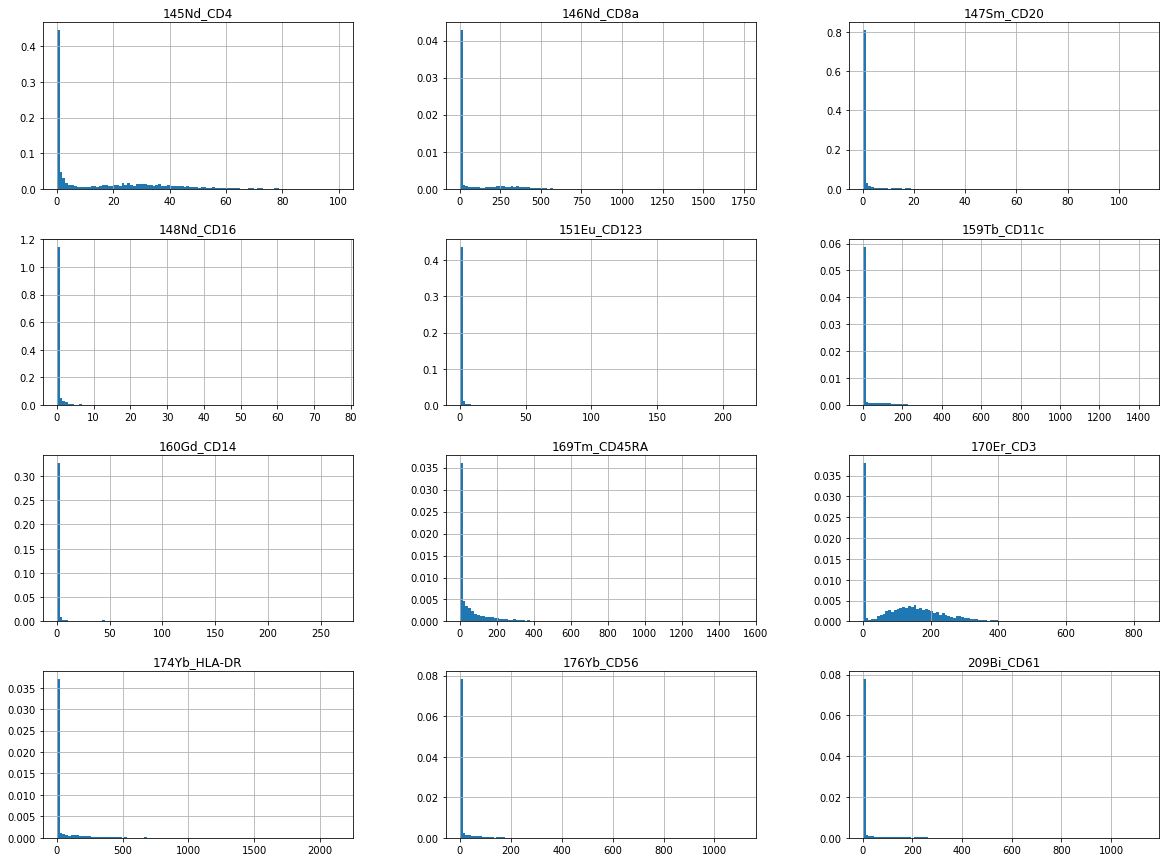

<IPython.core.display.Javascript object>

In [17]:
sampled_frame[all_features].hist(bins=100, figsize=(20, 15), density=True)
plt.show()

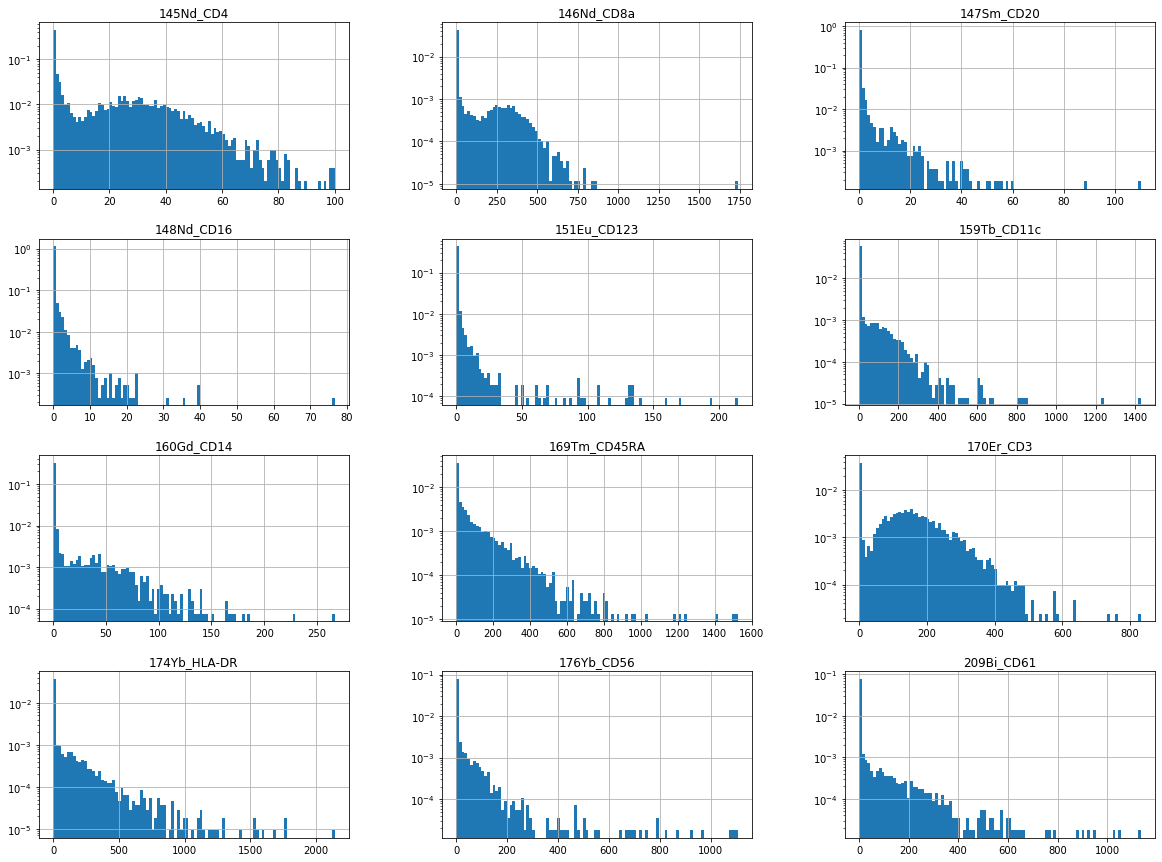

<IPython.core.display.Javascript object>

In [18]:
sampled_frame[all_features].hist(bins=100, figsize=(20, 15), density=True, log=True)
plt.show()

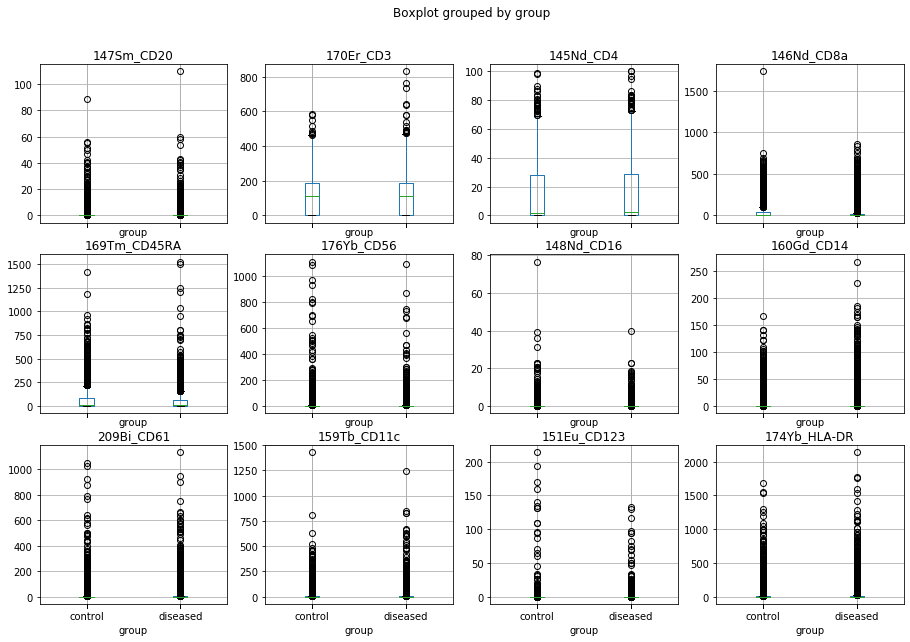

<IPython.core.display.Javascript object>

In [19]:
fig, axs = plt.subplots(3, 4, figsize=(15, 10), sharex=True)

for r_idx, features in enumerate(np.array_split(all_features, 3)):
    for c_idx, feature in enumerate(features):
        sampled_frame.boxplot(feature, by="group", ax=axs[r_idx][c_idx])

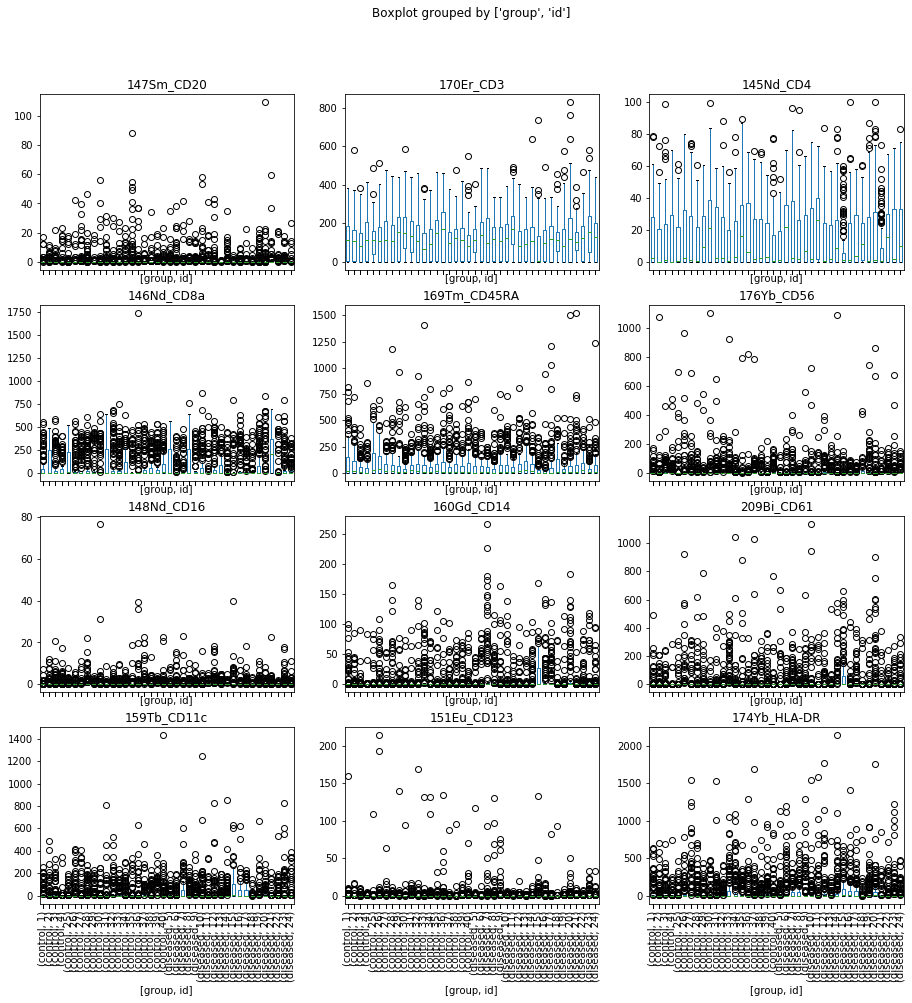

<IPython.core.display.Javascript object>

In [20]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15), sharex=True)

for r_idx, features in enumerate(np.array_split(all_features, 4)):
    for c_idx, feature in enumerate(features):
        sampled_frame.sort_values(by="group").boxplot(
            feature, by=["group", "id"], ax=axs[r_idx][c_idx], grid=False, rot=90
        )

#### Conclusion
* Features are centred close to zero
* We could see some small diferences in box plots

### Scaling

In [21]:
from sklearn.preprocessing import StandardScaler


def arcsinh_scale(x):
    return np.arcsinh(x / 5)

<IPython.core.display.Javascript object>

In [22]:
standard_scaled = data_frame.copy()

standard_scaled[all_features] = StandardScaler(
    copy=True, with_mean=True, with_std=True
).fit_transform(standard_scaled[all_features])

standard_scaled[:5]

,id,group,147Sm_CD20,170Er_CD3,145Nd_CD4,146Nd_CD8a,169Tm_CD45RA,176Yb_CD56,148Nd_CD16,160Gd_CD14,209Bi_CD61,159Tb_CD11c,151Eu_CD123,174Yb_HLA-DR
0,1,control,-0.158767,0.140394,1.081363,-0.347526,-0.425261,-0.241444,-0.037105,-0.271245,-0.212185,-0.314606,-0.127622,-0.324037
1,1,control,-0.158767,3.042487,1.055731,-0.378528,1.057889,-0.241444,-0.037105,-0.271245,-0.212185,-0.299490,-0.127622,-0.324037
2,1,control,-0.086332,1.274429,1.273288,-0.371953,0.386216,-0.230742,-0.037105,-0.271245,-0.200314,-0.314606,-0.127622,-0.324037
3,1,control,-0.158767,3.007335,1.496991,-0.360836,-0.082186,-0.241444,-0.037105,-0.271245,-0.212185,-0.314606,-0.127622,-0.324037
4,1,control,-0.158767,0.741570,0.102668,-0.378528,-0.498807,-0.241444,-0.037105,-0.271245,-0.212185,-0.314606,-0.127622,-0.324037


<IPython.core.display.Javascript object>

In [73]:
arcsin_scaled = data_frame.copy()
arcsin_scaled[all_features] = arcsin_scaled[all_features].apply(arcsinh_scale)

arcsin_scaled[:5]

,id,group,147Sm_CD20,170Er_CD3,145Nd_CD4,146Nd_CD8a,169Tm_CD45RA,176Yb_CD56,148Nd_CD16,160Gd_CD14,209Bi_CD61,159Tb_CD11c,151Eu_CD123,174Yb_HLA-DR
0,1,control,0.000000,3.961800,2.650942,0.944955,1.697582,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
1,1,control,0.000000,5.175994,2.637139,0.000000,4.381038,0.000000,0.0,0.0,0.000000,0.210443,0.0,0.0
2,1,control,0.097645,4.616773,2.748706,0.229578,3.831509,0.120707,0.0,0.0,0.213768,0.000000,0.0,0.0
3,1,control,0.000000,5.167441,2.851847,0.588617,3.117289,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
4,1,control,0.000000,4.360833,1.915577,0.000000,0.723585,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


<IPython.core.display.Javascript object>

#### Conclustion
We prepared two scalings, we will try them later in clustering step

### Correlations

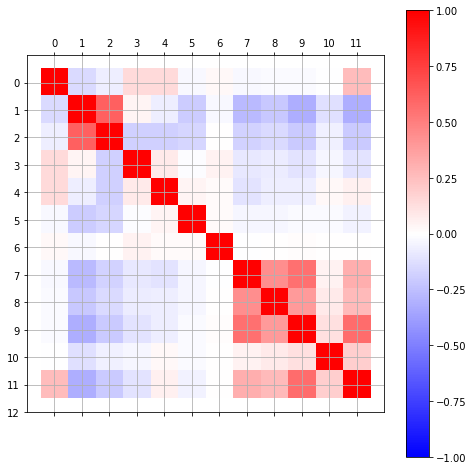

,170Er_CD3,145Nd_CD4,160Gd_CD14,159Tb_CD11c,174Yb_HLA-DR
170Er_CD3,1,0.62,-0.27,-0.32,-0.32
145Nd_CD4,0.62,1,-0.18,-0.21,-0.21
160Gd_CD14,-0.27,-0.18,1,0.56,0.32
159Tb_CD11c,-0.32,-0.21,0.56,1,0.58
174Yb_HLA-DR,-0.32,-0.21,0.32,0.58,1


<IPython.core.display.Javascript object>

In [24]:
corr = standard_scaled[all_features].corr()

fig = plt.figure(figsize=(8, 8))
plt.matshow(corr, fignum=fig.number, cmap="bwr", vmin=-1, vmax=1)
plt.grid()
plt.colorbar()

plt.xticks(np.arange(0, all_features.shape[0], 1))
plt.yticks(np.arange(all_features.shape[0], -1, -1))

plt.xlim(-1, all_features.shape[0])
plt.ylim(all_features.shape[0], -1)

plt.show()

crt = np.sum(corr.abs() > 0.5, axis=0) > 1

corr_frame = corr[crt.index[crt]].loc[crt.values]

corr_frame.style.background_gradient(cmap="coolwarm", axis=None).set_precision(2)

#### Conlusion
There are no significant correlations

## Task 2 - Dimensionality reduction
(15 points)

- Visualize the mass cytometry dataset using at least three different representation learning algorithms.
- Explain your choices of algorithms. 
- For each algorithm, explain your choice of parameters. 
- For each dimensionality reduction, describe the main features you see and discuss if these features come from the data or the dimensionality reduction technique.
- Discuss the differences and similarities of your dimensionality reductions. 

### Methods selection

In [25]:
from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

# Dissabling Numba warnning for UMAP (https://github.com/lmcinnes/umap/issues/252)
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [26]:
methods = (
    ("PCA", PCA(n_components=2)),
    ("t-SNE", TSNE(n_components=2, perplexity=30.0, random_state=42)),
    ("UMAP", UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)),
)

<IPython.core.display.Javascript object>

#### Methods

I have chosen three methods PCA, t-SNE, and UMAP. PCA is simple and scalable. Although it's not primarily a method for data visualization, it could give us interesting information about data variance and components importance (by explained variance ratio). On the other hand, tSNE and UMAP are both very good visualization methods. They are trying to capture local similarities of the datasets and transfer them to lower dimensions. The advantage of UMAP over t-SNE is that it is faster and preserving the global structure of the data better.

In [27]:
transformed_data = {}

<IPython.core.display.Javascript object>

In [28]:
for name, method in tqdm(methods):
    transformed_data[name] = method.fit_transform(
        arcsin_scaled.iloc[sampled_frame.index][all_features]
    )

<IPython.core.display.Javascript object>

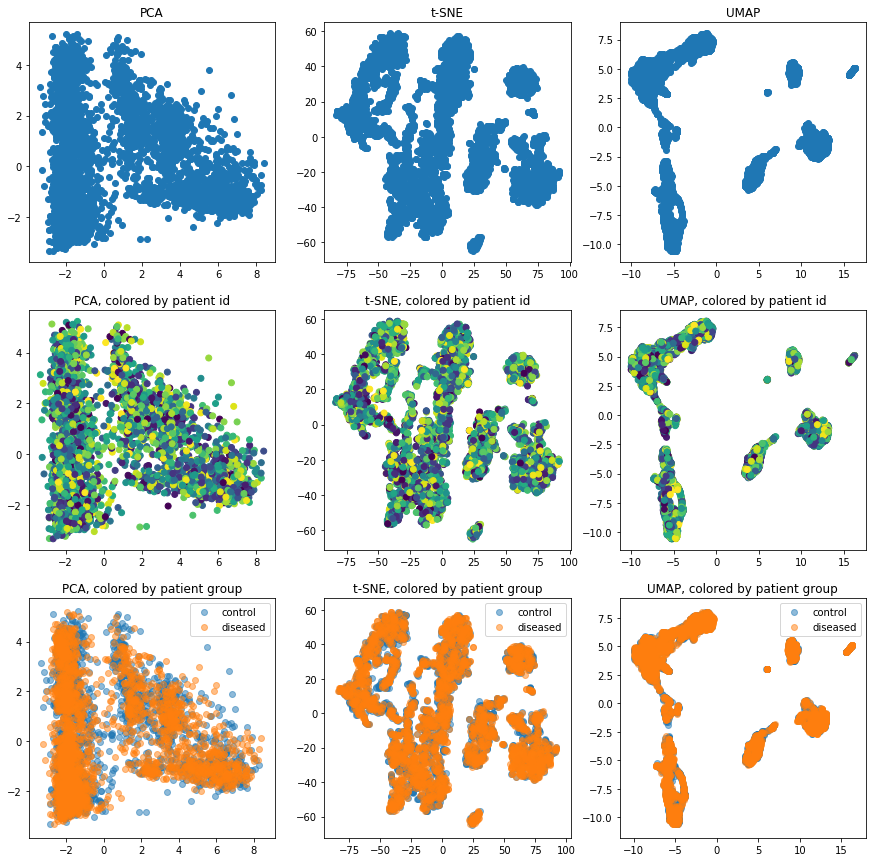

<IPython.core.display.Javascript object>

In [29]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for ax, mt in zip(axs[0], transformed_data.items()):
    name, transformed = mt
    ax.scatter(transformed.T[0], transformed.T[1])
    ax.set_title(name)

for ax, mt in zip(axs[1], transformed_data.items()):
    name, transformed = mt
    ax.scatter(transformed.T[0], transformed.T[1], c=sampled_frame["id"])
    ax.set_title(f"{name}, colored by patient id")

for ax, mt in zip(axs[2], transformed_data.items()):
    name, transformed = mt

    labels = np.unique(sampled_frame["group"])

    for label in labels:

        ax.scatter(
            transformed[sampled_frame["group"] == label].T[0],
            transformed[sampled_frame["group"] == label].T[1],
            label=label,
            alpha=0.5,
        )
    ax.legend()
    ax.set_title(f"{name}, colored by patient group")

plt.show()

#### Methods parameters: 
* PCA has no parameters to fine-tune (`svd_solver` is chosen automatically based on the shape of input). 
* tSNE - `perplexity`
    * is related to the number of nearest neighbors that are used in other manifold learning algorithms
    * larger datasets usually require a larger perplexity
    * recommended from 5 to 50, default 30
* UMAP 
    * `n_neighbors` - controls how UMAP balances local versus global structure in the data
    * `min_dist` - controls how tightly UMAP is allowed to pack points together

#### Final setup:
I'll use the default parameters for each method. Both tSNE and UMAP return very different results with different parameters. Yet none of these results showed something significant in visualization. For example, for UMAP with increasing `n_neighbors`, we could see two obvious clusters (as we see for `n_neighbors=15`). This seems very interesting because it could be separated by the patient group, yet if we color the points by it, we can not see any separation.

### PCA explained variance


In [30]:
pca = PCA()

pca.fit(standard_scaled[all_features])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

<IPython.core.display.Javascript object>

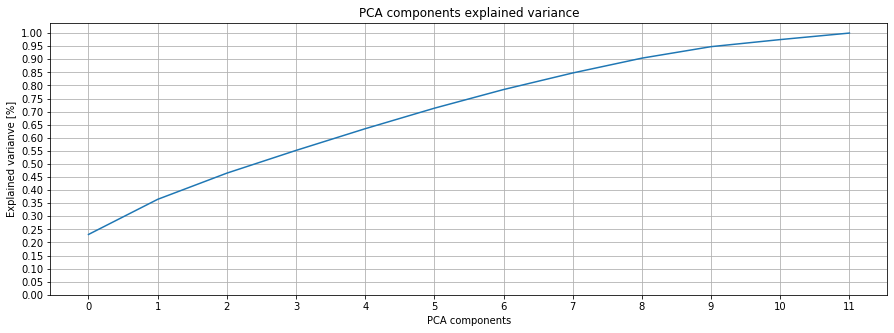

<IPython.core.display.Javascript object>

In [31]:
plt.figure(figsize=(15, 5))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.yticks(np.arange(0, 1.05, 0.05))
plt.xticks(np.arange(0, pca.components_.shape[0]))
plt.grid()

plt.title("PCA components explained variance")
plt.xlabel("PCA components")
plt.ylabel("Explained varianve [%]")

plt.show()

#### Conclusion
We could not see any significant changes in explained variance. We could get 95% explained variance with eight components, and there is almost no difference between the last two components. But because the number of features is not very large, we could use them all, and we want to lose any information.

### UMAP for Supervised Dimension Reduction

UMAP is mostly used as an unsupervised method for visualization, but it also offers and supervised way. We will try to use patient groups and patient ids as labels. It's recommended to use larger `n_neigbors` [[ref](https://umap-learn.readthedocs.io/en/latest/supervised.html)]. 

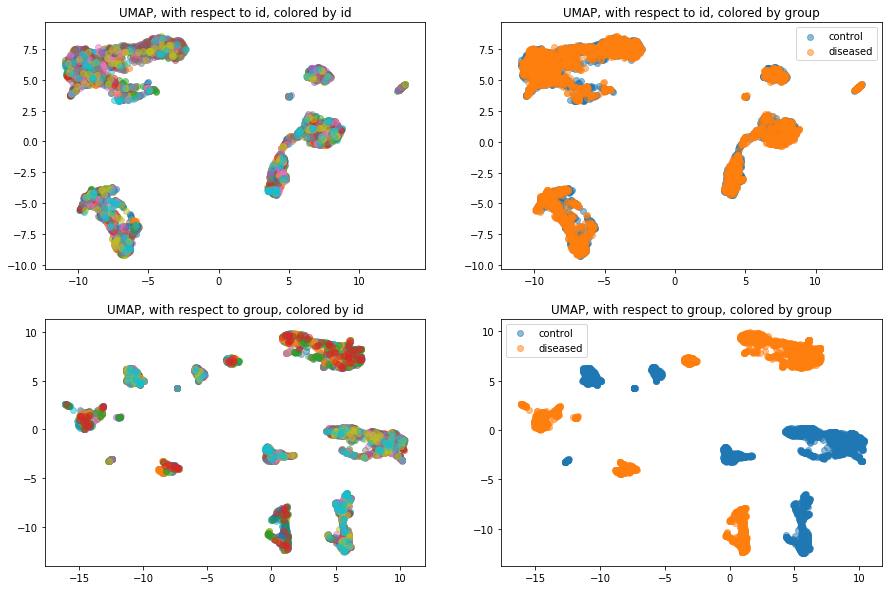

<IPython.core.display.Javascript object>

In [66]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for ax, index in zip(axs, ["id", "group"]):
    umap = UMAP(n_components=2, n_neighbors=30, min_dist=0.1, random_state=42)

    encoder = LabelEncoder()
    y = encoder.fit_transform(sampled_frame[index])

    transformed = umap.fit_transform(
        arcsin_scaled.iloc[sampled_frame.index][all_features], y=y,
    )

    for a, idx in zip(ax, ["id", "group"]):
        labels = np.unique(sampled_frame[idx])
        for label in labels:
            a.scatter(
                transformed[sampled_frame[idx] == label].T[0],
                transformed[sampled_frame[idx] == label].T[1],
                label=label,
                alpha=0.5,
            )
        if idx == "group":
            a.legend()
        a.set_title(f"UMAP, with respect to {index}, colored by {idx}")

plt.show()

We could see that the supervised visualization for patient groups is very successful. We need to test this using "cross-validation".

In [33]:
from sklearn.model_selection import KFold

<IPython.core.display.Javascript object>

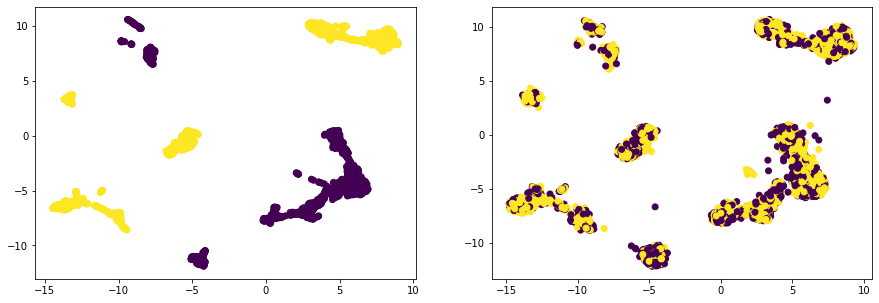

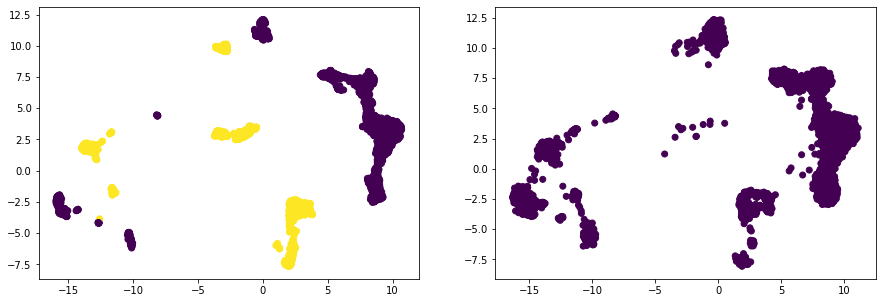

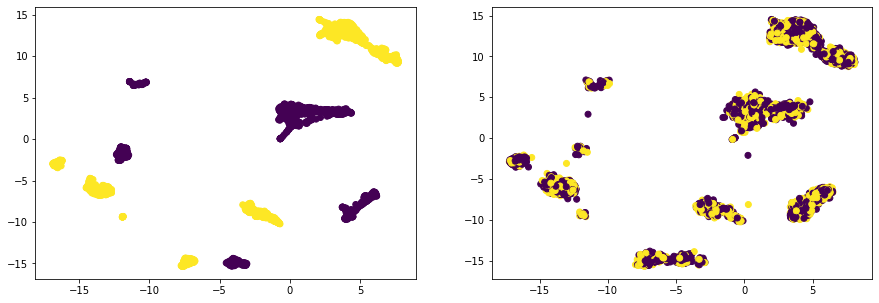

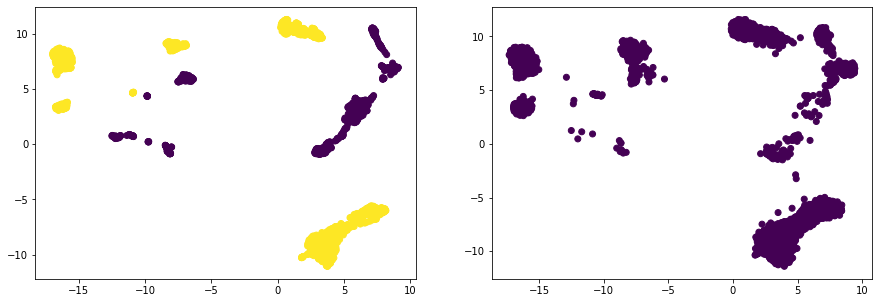

<IPython.core.display.Javascript object>

In [74]:
kfold = KFold(4, random_state=42)
encoder = LabelEncoder()

for train_index, test_index in kfold.split(standard_scaled):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    umap = UMAP(n_components=2, n_neighbors=30, min_dist=0.1, random_state=42)

    train_frame_sample = arcsin_scaled.iloc[train_index].sample(2000, random_state=42)
    test_frame_sample = arcsin_scaled.iloc[test_index].sample(5000, random_state=42)

    y = encoder.fit_transform(train_frame_sample["group"])

    train_transformed = umap.fit_transform(train_frame_sample[all_features], y=y)

    axs[0].scatter(train_transformed[:, 0], train_transformed[:, 1], c=y)

    test_transformed = umap.transform(test_frame_sample[all_features])

    axs[1].scatter(
        test_transformed[:, 0],
        test_transformed[:, 1],
        c=encoder.transform(test_frame_sample["group"]),
    )

    plt.show()

Unfortunately, once it's used on previously unseen data, results are not satisfying anymore.

## Task 3 - Clustering

(25 points)

- Train at least five cluster algorithms discussed in class on the mass cytometry dataset.
- Explain your choices of algorithms. 
- For each algorithm, explain how your choice of parameters.
- Check the clustering performance using two different internal cluster validation measures (explain your choices).
- Discuss the performance (computation time, internal validation) of different methods. 
- Visualize the three best clusterings using the dimensionality reduction from above. Use the coordinates of the dimensionality reduction and color points by the cluster they belong to. Use a qualitative color scale. 
- Discuss how the dimensionality reduction and the clustering algorithms agree with each other. 

In [35]:
from itertools import product
from time import time

from scipy.spatial import cKDTree

<IPython.core.display.Javascript object>

### Alghoritms selection

I have chosen these algorithms:
* KMeans
    * simple,  flat geometry, very scalable
    * fixed number of clusters
* Hierarchical clustering
    * simple, scalable
    * new clusters by merging closest clusters (points)
    * using ward, single, average and complete linkage (once cached, it takes almost no time)
    * fixed number of clusters
* Spectral clustering
    * non-flat geometry
    * low-dimension embedding of the affinity matrix between samples, followed by a KMeans in the low dimensional space
    * fixed number of clusters
* DBSCAN/HDBSCAN/OPTICS
    * non-flat geometry
    * clusters as areas of high density separated by areas of low density
    * OPTICS is a relaxed version of DBSCAN. It does not require eps parameter
    * variable number of clusters
	

In [36]:
from sklearn.cluster import (
    KMeans,
    OPTICS,
    DBSCAN,
    SpectralClustering,
    AgglomerativeClustering,
)

from hdbscan import HDBSCAN

<IPython.core.display.Javascript object>

### Internal validation metrics

In [37]:
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)

<IPython.core.display.Javascript object>

* **Silhouette score** \[[ref](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)\]
    * mean intra-cluster distance and the mean nearest-cluster distance for each sample
    * the best value is 1 and the worst value is -1
* **Calinski and Harabasz score (Variance Ratio Criterion)** \[[ref](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html#sklearn.metrics.calinski_harabasz_score)\]
    * ratio between the within-cluster dispersion and the between-cluster dispersion
    * higher score relates to a model with better defined clusters
* **Davies-Bouldin score** \[[ref](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html#sklearn.metrics.davies_bouldin_score)\]
    * the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances
    * the minimum score is zero, with lower values indicating better clustering

All of these scores are generally worse for convex clusters than other concepts of clusters, such as density-based clusters (DBSCAN,  HDBSCAN, etc.). So we need to be careful about results from these methods.

### Parameters selection

#### Number of clusters

For methods that require the number of clusters as the parameter, we will try two (patient groups), four (sex), forty (number of patients). Additionally, I'll add ten and twenty. We'll check the performance later.

In [38]:
number_of_clusters = [4, 6, 10, 20]

<IPython.core.display.Javascript object>

#### DBSCAN/HDBSCAN and OPTICS parameters
As DBSCAN has parameters `eps` and `min_samples`, HDBSCAN and OPTICS share just `min_samples` parameter.
I'll choose these parameters based on the number distance to the nearest neighbor and the number of points in this distance.

In [75]:
X = arcsin_scaled.iloc[sampled_frame.index][all_features].values
X.shape

(5000, 12)

<IPython.core.display.Javascript object>

In [76]:
kdtree = cKDTree(X)

<IPython.core.display.Javascript object>

In [77]:
dist_to_nearest = kdtree.query(X, 2)[0][:, 1]

<IPython.core.display.Javascript object>

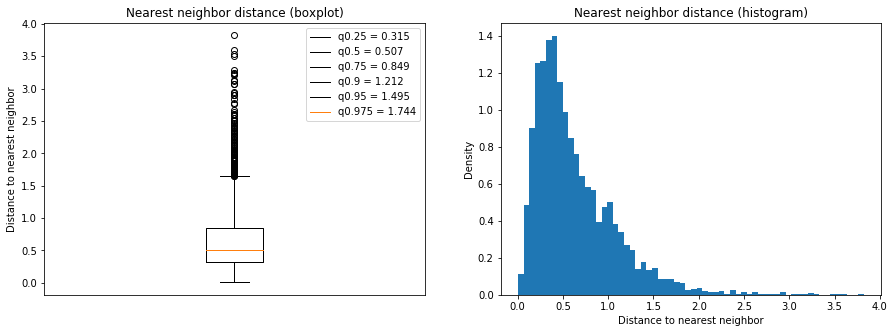

<IPython.core.display.Javascript object>

In [78]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].boxplot(dist_to_nearest)

quantiles = [0.25, 0.5, 0.75, 0.9, 0.95, 0.975]

axs[0].legend(
    [
        f"q{num} = {q:.3f}"
        for q, num in zip(np.quantile(dist_to_nearest, quantiles), quantiles)
    ]
)
axs[0].set_title("Nearest neighbor distance (boxplot)")
axs[0].set_ylabel("Distance to nearest neighbor")
axs[0].set_xticks([])


axs[1].hist(dist_to_nearest, bins="auto", density=True)
axs[1].set_title("Nearest neighbor distance (histogram)")
axs[1].set_ylabel("Density")
axs[1].set_xlabel("Distance to nearest neighbor")

plt.show()

In [81]:
eps_values = [1.212, 1.495, 1.744]

<IPython.core.display.Javascript object>

I'll use `eps` close to quantiles $0.90, 0.95$ and $0.975$. Now we need to calculate `min_samples` for them.

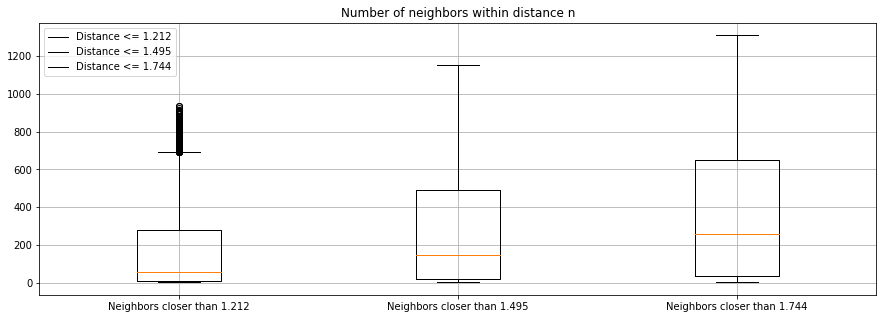

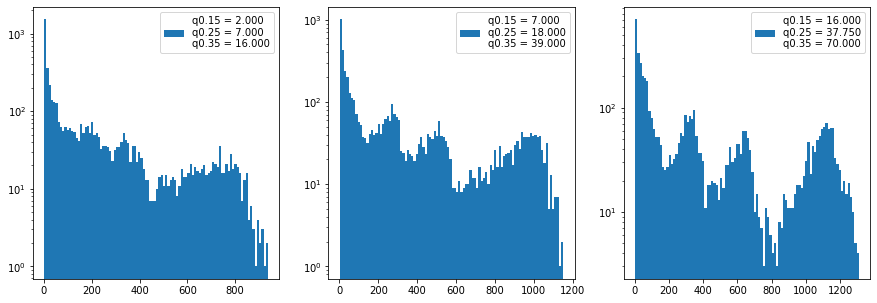

<IPython.core.display.Javascript object>

In [82]:
plt.figure(figsize=(15, 5))
data = np.vstack(
    [kdtree.query_ball_point(X, num, return_length=True) for num in eps_values]
).T
plt.boxplot(data, labels=[f"Neighbors closer than {num}" for num in eps_values])
plt.legend([f"Distance <= {num}" for num in eps_values])

plt.grid()

plt.title("Number of neighbors within distance n")

plt.show()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, dt in zip(axs, data.T):
    ax.hist(dt, bins=100, log=True)
    quantiles = [0.15, 0.25, 0.35]

    ax.legend(
        [
            "\n".join(
                [
                    f"q{num} = {q:.3f}"
                    for q, num in zip(np.quantile(dt, quantiles), quantiles)
                ]
            )
        ]
    )

plt.show()

In [83]:
min_samples_vals = [16, 39, 72]

<IPython.core.display.Javascript object>

### Methods testing

In [84]:
nc_methods = (
    *[(f"KMeans {num}", KMeans(num, random_state=42)) for num in number_of_clusters],
    *[
        (
            f"WardLinkage {num}",
            AgglomerativeClustering(num, linkage="ward", memory=".mem_cache/"),
        )
        for num in number_of_clusters
    ],
    *[
        (
            f"AverageLinkage {num}",
            AgglomerativeClustering(num, linkage="average", memory=".mem_cache/"),
        )
        for num in number_of_clusters
    ],
    *[
        (
            f"CompleteLinkage {num}",
            AgglomerativeClustering(num, linkage="complete", memory=".mem_cache/"),
        )
        for num in number_of_clusters
    ],
    *[
        (
            f"SingleLinkage {num}",
            AgglomerativeClustering(num, linkage="single", memory=".mem_cache/"),
        )
        for num in number_of_clusters
    ],
)

scan_methods = (
    *[
        (f"DBSCAN {eps} {min_samples}", DBSCAN(eps=eps, min_samples=min_samples),)
        for eps, min_samples in zip(eps_values, min_samples_vals)
    ],
    *[
        (f"HDBSCAN {min_samples}", HDBSCAN(min_samples=min_samples))
        for min_samples in min_samples_vals
    ],
    *[
        (f"OPTICS {min_samples}", OPTICS(min_samples=min_samples),)
        for min_samples in min_samples_vals
    ],
)

<IPython.core.display.Javascript object>

In [85]:
cl_methods = (
    *nc_methods,
    *scan_methods,
)

<IPython.core.display.Javascript object>

In [86]:
X.shape

(5000, 12)

<IPython.core.display.Javascript object>

In [87]:
records = []
for name, method in tqdm(cl_methods):

    res = {"method": name}

    start_time = time()
    X_tmp = X
    try:
        predicted = method.fit_predict(X_tmp)
    except Exception as e:
        print(f"{name} fit error: {e}")
        continue
    res["time"] = time() - start_time

    try:
        # inverse so lower == better
        res["silhouette_score"] = -silhouette_score(X_tmp, predicted)
        res["calinski_harabasz_score"] = -calinski_harabasz_score(X_tmp, predicted)
        res["davies_bouldin_score"] = davies_bouldin_score(X_tmp, predicted)
    except Exception as e:
        print(f"{name} error: {e}")
        continue
    res["n_clusters"] = np.unique(predicted).shape[0]
    res["predicted"] = predicted
    records.append(res)

    if "DBSCAN" in name or "OPTICS" in name:
        res = dict(**res)
        name = name + " (without noise)"
        res["method"] = name

        selected = predicted != -1

        res["noise"] = np.sum(~selected) / predicted.shape[0]

        try:
            # inverse so lower == better
            res["silhouette_score"] = -silhouette_score(
                X[selected], predicted[selected]
            )
            res["calinski_harabasz_score"] = -calinski_harabasz_score(
                X[selected], predicted[selected]
            )
            res["davies_bouldin_score"] = davies_bouldin_score(
                X[selected], predicted[selected]
            )
        except Exception as e:
            print(f"{name} error: {e}")
            continue
        records.append(res)

OPTICS 72 (without noise) error: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)



<IPython.core.display.Javascript object>

In [88]:
results = pd.DataFrame(records).set_index("method")
result_scores = results[[x for x in results.columns if x.endswith("score")]]
scans_index = np.array(["DBSCAN" in x or "OPTICS" in x for x in results.index])
wth_predicted = [x for x in results.columns if x != "predicted"]

<IPython.core.display.Javascript object>

### Number of clusters methods

In [89]:
results[wth_predicted].iloc[~scans_index].round(3)

,time,silhouette_score,calinski_harabasz_score,davies_bouldin_score,n_clusters,noise
method,,,,,,
KMeans 4,0.181,-0.439,-2946.400,1.103,4,NaN
KMeans 6,0.165,-0.421,-2900.327,0.933,6,NaN
KMeans 10,0.275,-0.413,-2641.162,1.143,10,NaN
KMeans 20,0.638,-0.309,-1789.608,1.317,20,NaN
WardLinkage 4,0.048,-0.435,-2880.215,1.114,4,NaN
WardLinkage 6,0.045,-0.413,-2821.311,0.940,6,NaN
WardLinkage 10,0.044,-0.389,-2402.188,1.256,10,NaN
WardLinkage 20,0.045,-0.345,-1651.944,1.339,20,NaN
AverageLinkage 4,0.027,-0.302,-647.395,1.142,4,NaN


<IPython.core.display.Javascript object>

In [90]:
result_scores.iloc[~scans_index].rank(numeric_only=True)

,silhouette_score,calinski_harabasz_score,davies_bouldin_score
method,,,
KMeans 4,2.0,1.0,10.0
KMeans 6,5.0,2.0,5.0
KMeans 10,7.0,5.0,14.0
KMeans 20,15.0,8.0,18.0
WardLinkage 4,4.0,3.0,12.0
WardLinkage 6,6.0,4.0,7.0
WardLinkage 10,8.0,6.0,17.0
WardLinkage 20,13.0,9.0,19.0
AverageLinkage 4,16.0,16.0,13.0


<IPython.core.display.Javascript object>

In [91]:
pd.DataFrame(
    results.iloc[~scans_index].rank(numeric_only=True).mean(axis=1).sort_values(),
    columns=["Average rank"],
)[:5]

,Average rank
method,
CompleteLinkage 6,5.4
KMeans 4,6.8
KMeans 6,7.4
WardLinkage 4,7.6
WardLinkage 6,8.0


<IPython.core.display.Javascript object>

In [92]:
pd.DataFrame(
    results.iloc[~scans_index].rank(numeric_only=True).mean(axis=1).sort_values(),
    columns=["Average rank"],
)[-5:]

,Average rank
method,
SingleLinkage 10,12.2
CompleteLinkage 20,14.0
SingleLinkage 20,14.2
WardLinkage 20,14.6
KMeans 20,15.8


<IPython.core.display.Javascript object>

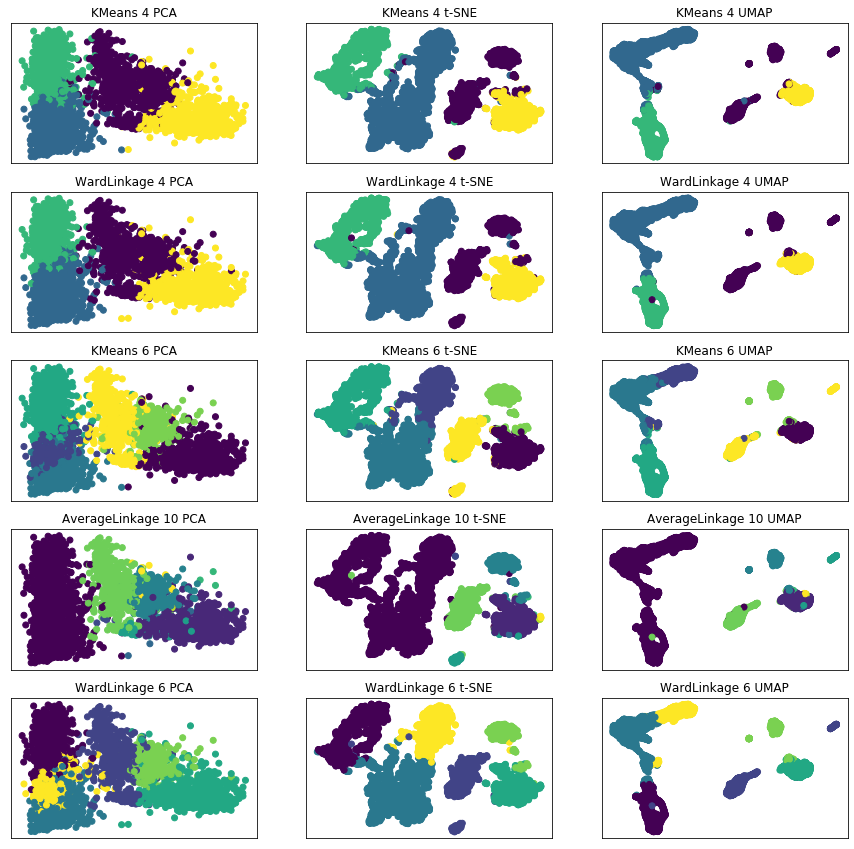

<IPython.core.display.Javascript object>

In [93]:
best = ["KMeans 4", "WardLinkage 4", "KMeans 6", "AverageLinkage 10", "WardLinkage 6"]
fig, axss = plt.subplots(len(best), 3, figsize=(15, 15))

for in_row, axs in zip(results.loc[best].iterrows(), axss):
    # print(row["predicted"])
    index, row = in_row
    for ax, mt in zip(axs, transformed_data.items()):
        name, transformed = mt
        ax.scatter(transformed.T[0], transformed.T[1], c=row["predicted"])
        ax.set_title(f"{index} {name}")
        ax.set_yticks([])
        ax.set_xticks([])

plt.show()

### DBSCAN methods

In [94]:
results[wth_predicted].iloc[scans_index].round(3)

,time,silhouette_score,calinski_harabasz_score,davies_bouldin_score,n_clusters,noise
method,,,,,,
DBSCAN 1.212 16,0.435,-0.324,-1054.046,1.412,8,NaN
DBSCAN 1.212 16 (without noise),0.435,-0.548,-1859.709,0.610,8,0.222
DBSCAN 1.495 39,0.399,-0.368,-1379.856,1.287,7,NaN
DBSCAN 1.495 39 (without noise),0.399,-0.548,-2381.703,0.633,7,0.195
DBSCAN 1.744 72,0.754,-0.305,-919.837,1.403,6,NaN
DBSCAN 1.744 72 (without noise),0.754,-0.435,-1108.454,0.712,6,0.168
HDBSCAN 16,0.712,-0.338,-971.544,1.441,8,NaN
HDBSCAN 16 (without noise),0.712,-0.558,-2250.337,0.649,8,0.225
HDBSCAN 39,0.447,-0.355,-1174.998,1.500,7,NaN


<IPython.core.display.Javascript object>

In [95]:
results[wth_predicted].loc[~np.isnan(results.noise)].round(3)

,time,silhouette_score,calinski_harabasz_score,davies_bouldin_score,n_clusters,noise
method,,,,,,
DBSCAN 1.212 16 (without noise),0.435,-0.548,-1859.709,0.610,8,0.222
DBSCAN 1.495 39 (without noise),0.399,-0.548,-2381.703,0.633,7,0.195
DBSCAN 1.744 72 (without noise),0.754,-0.435,-1108.454,0.712,6,0.168
HDBSCAN 16 (without noise),0.712,-0.558,-2250.337,0.649,8,0.225
HDBSCAN 39 (without noise),0.447,-0.568,-2860.584,0.648,7,0.219
HDBSCAN 72 (without noise),0.448,-0.574,-2983.170,0.627,7,0.223
OPTICS 16 (without noise),9.641,-0.608,-701.385,0.590,4,0.925
OPTICS 39 (without noise),8.579,-0.713,-1200.080,0.355,3,0.927


<IPython.core.display.Javascript object>

In [96]:
result_scores.iloc[scans_index].rank(numeric_only=True)

,silhouette_score,calinski_harabasz_score,davies_bouldin_score
method,,,
DBSCAN 1.212 16,13.0,11.0,14.0
DBSCAN 1.212 16 (without noise),7.0,5.0,3.0
DBSCAN 1.495 39,9.0,6.0,12.0
DBSCAN 1.495 39 (without noise),6.0,3.0,5.0
DBSCAN 1.744 72,14.0,13.0,13.0
DBSCAN 1.744 72 (without noise),8.0,10.0,8.0
HDBSCAN 16,12.0,12.0,15.0
HDBSCAN 16 (without noise),5.0,4.0,7.0
HDBSCAN 39,11.0,9.0,17.0


<IPython.core.display.Javascript object>

In [97]:
pd.DataFrame(
    result_scores.iloc[scans_index].rank(numeric_only=True).mean(axis=1).sort_values(),
    columns=["Average rank"],
)[:15]

,Average rank
method,
HDBSCAN 72 (without noise),2.666667
OPTICS 39 (without noise),3.333333
HDBSCAN 39 (without noise),4.000000
DBSCAN 1.495 39 (without noise),4.666667
DBSCAN 1.212 16 (without noise),5.000000
HDBSCAN 16 (without noise),5.333333
OPTICS 16 (without noise),6.000000
DBSCAN 1.744 72 (without noise),8.666667
DBSCAN 1.495 39,9.000000


<IPython.core.display.Javascript object>

In [98]:
pd.DataFrame(
    result_scores.iloc[scans_index].rank(numeric_only=True).mean(axis=1).sort_values(),
    columns=["Average rank"],
)[-5:]

,Average rank
method,
HDBSCAN 16,13.000000
DBSCAN 1.744 72,13.333333
OPTICS 16,13.666667
OPTICS 39,13.666667
OPTICS 72,14.666667


<IPython.core.display.Javascript object>

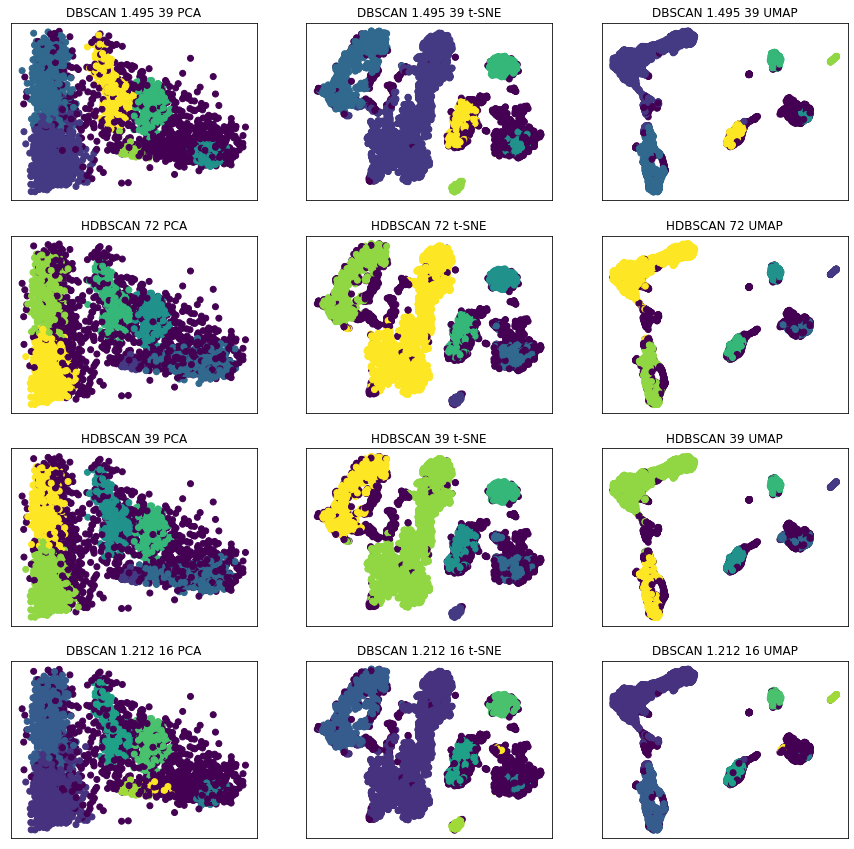

<IPython.core.display.Javascript object>

In [102]:
best = ["DBSCAN 1.495 39", "HDBSCAN 72", "HDBSCAN 39", "DBSCAN 1.212 16"]
fig, axss = plt.subplots(len(best), 3, figsize=(15, 15))

for in_row, axs in zip(results.loc[best].iterrows(), axss):
    # print(row["predicted"])
    index, row = in_row
    for ax, mt in zip(axs, transformed_data.items()):
        name, transformed = mt
        ax.scatter(transformed.T[0], transformed.T[1], c=row["predicted"])
        ax.set_title(f"{index} {name}")
        ax.set_yticks([])
        ax.set_xticks([])

plt.show()

## Task 4 - External validation
(10 points)

- For each patient, calculate the cluster sizes of the best clustering. 
- Visualize these cluster sizes using a simple representation learning algorithm (explain your choice). 
- Use two supervised learning methods with the cluster sizes as predictors and patient group as outcome. The dataset is very small, so report on cross-validation accuracy and AUC. 
- Explain your choices of algorithms. 
- Explain how you performed the cross-validation step. 
- Discuss how this classification validated your clustering in the previous step. 